# Uczenie nienadzorowane

Do tej pory zajmowaliśmy się uczeniem nadzorowanym (ang. *supervised*), tj. takimi przypadkami, gdy zbiór trenujący składał się z dwóch zmiennych `X` i `y`, a naszym zadaniem było przewidzenia `y` na podstawie danych z `X`. Ponadto poznaliśmy odpowiednie metryki, które pozwalały nam zmierzyć jak dobrze (lub) źle działają modele, które wytrenowaliśmy.

Przypomnijmy, że na uczenie maszynowe składają się trzy paradygmaty:
 * supervised learning
 * unsupervised learning
 * reinforcement learning
 
Dzisiejsze zajęcia są poświęcone drugiemu paradygmatowi, czyli uczeniu nienadzorowanym, a dokładniej automatycznemu klastrowaniu. Do klastrowania służą m.in. następujące algorytmy:
 * K-średnich (ang. *k-means*)
 * [DB-SCAN](https://en.wikipedia.org/wiki/DBSCAN)

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

**Zadanie 0**: wczytaj do zmiennej `points` zbiór danych z pliku `points.csv`. Uwaga: kolumny są rozdzielone spacją. Plik nie zawiera nagłówka.

In [3]:
points  = pd.read_csv('points.csv', sep=' ', header=None)

Narysujmy wykres z wyżej wczytanych punktów.

<AxesSubplot: xlabel='0', ylabel='1'>

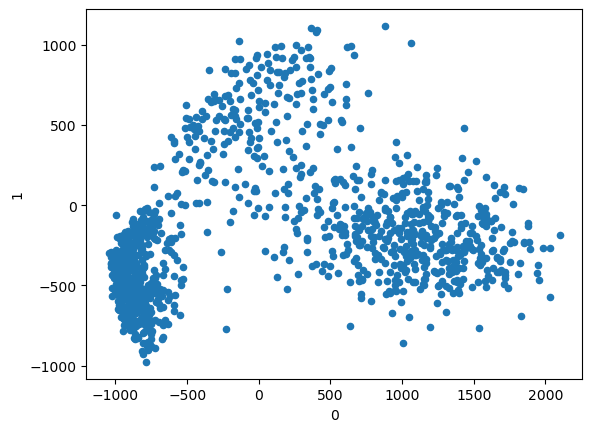

In [4]:
xs = points[0]
ys = points[1]

points.plot(kind='scatter', x=0, y=1)

**zadanie 1** Ile dostrzegasz rozdzielnych grup punktów na powyższym wykresie?

In [5]:
~3

-4

Podstawowym akgorytmem do klastrowania danych jest $k$-średnich albo k-means, który został omówiony na wykładzie.  Oczywiście biblioteka `sklearn` zawiera implementację tego algorytmu.

**zadanie 2** Wczytaj z biblioteki `sklearn.cluster` klasę `KMeans`.

In [6]:
from sklearn.cluster import KMeans

Algorytm k-means  wymaga podania oczekiwanej liczby klas, dlatego podczas tworzenia obiektu `KMeans` musimy podać parametr `n_clusters`. W poniższym przykładzie ustawiamy powyższy parametr na 3.

In [7]:
kmeans = KMeans(n_clusters=3)

**zadanie 3** Wywołaj metodę `fit` na obiekcie `kmeans` i jako parametr przekaż zmienną `points`. W taki sposób wytrenujesz model.

In [8]:
kmeans.fit(points)

C:\Users\conta\anaconda3\envs\python\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\conta\anaconda3\envs\python\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(


KMeans(n_clusters=3)

**zadanie 4** Mając wytrenowany model k-średnich, możemy wyznaczyć klaster, do którego został przydzielony każdy z punktów. Służy do tego komenda *predict*. Wywołaj tę komendę na zmiennej *points* i zapisz wynik do zmiennej *clusters*.

In [9]:
clusters = kmeans.predict(points)

Wyświetlmy, w jaki sposób model podzielił punkty:

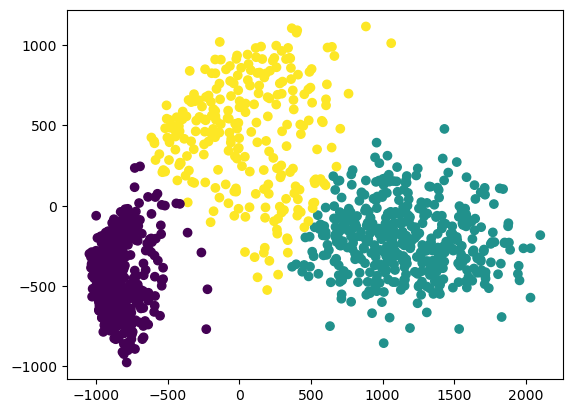

In [10]:
plt.scatter(x=points[0], y=points[1], c=clusters)
plt.show()

Informacje o centroidach są przechowywwane w atrybucie `cluster_centers_`:

In [11]:
for idx, centroid in enumerate(kmeans.cluster_centers_):
    print("Claster ID: {}\tX: {}\tY:{}".format(idx, centroid[0], centroid[1]))

Claster ID: 0	X: -844.3076877296984	Y:-450.07153180895205
Claster ID: 1	X: 1158.9296227871432	Y:-212.2805521175457
Claster ID: 2	X: 60.61234354820599	Y:444.8494302023744


**zadanie 5** Sprawdź, w jaki sposób podzieli zbiór punktów model k-średnich, jeżeli ustawimy liczbę klastrów na 2 i 4.

C:\Users\conta\anaconda3\envs\python\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\conta\anaconda3\envs\python\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(


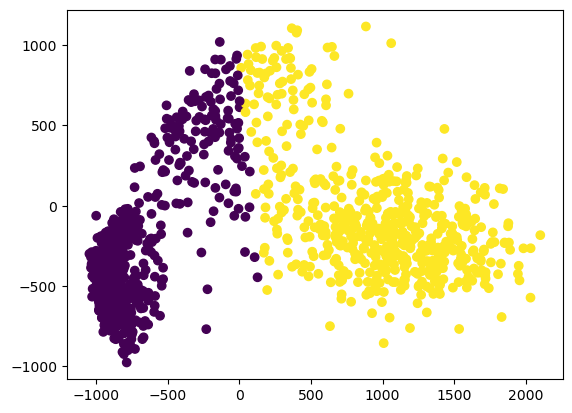

C:\Users\conta\anaconda3\envs\python\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\conta\anaconda3\envs\python\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(


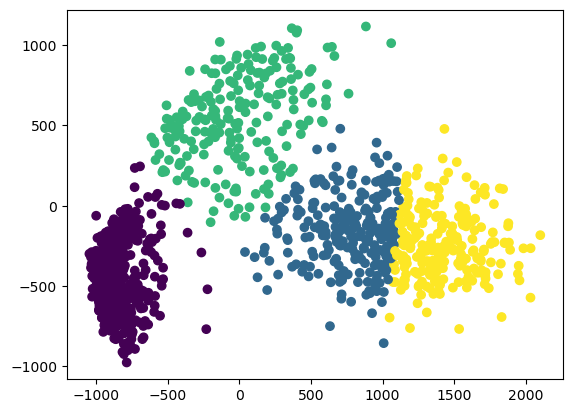

In [12]:
for number_of_clusters in [2, 4]:
    kmeans = KMeans(n_clusters=number_of_clusters)
    kmeans.fit(points)
    clusters = kmeans.predict(points)
    plt.scatter(x=points[0], y=points[1], c=clusters)
    plt.show()

Algorytm k-średnich minimalizuje sumę odległości do najbliżsego centroidu, co możemy traktować jako funkcje kosztu i wykorzystać to porównania pomiędzy modelami z różnymi liczbami klastrów.

C:\Users\conta\anaconda3\envs\python\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\conta\anaconda3\envs\python\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(
C:\Users\conta\anaconda3\envs\python\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\conta\anaconda3\envs\python\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available th

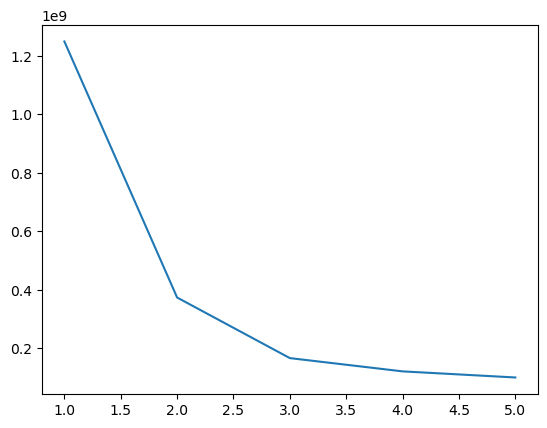

In [13]:
n_clusters = [1, 2, 3, 4, 5]
inertias = []

for n_cluster in n_clusters:
    model = KMeans(n_clusters=n_cluster)
    model.fit(points)
    inertias.append(model.inertia_)

plt.plot(n_clusters, inertias)
plt.show()

Powyższy wykres przedstawia zależność pomiędzy liczbą klastrów, a funkcją kosztu. Można łatwo zauważyć, powyżej 3 klastrów zależność na wygładza się. Stąd, liczba 3 wydaje się być najlepszym wyborem.

Drugim popularnym algorytmem jest DB-SCAN, który nie wymaga `a priori` podania liczby klastrów, którą sam ją wyznacza. Ponadto, cechą tego modelu jest możliwość pominięcia niektórych punktów, które są oddalone od skupisk.

In [14]:
from sklearn.cluster import DBSCAN

Model DB-SCAN przyjmuje dwa parametry: eps - odległość pomiędzy punktami i minimalną liczbę punktów potrzebna do utworzenia klastra.

In [15]:
db = DBSCAN(eps=130, min_samples=10)
labels = db.fit_predict(points)
labels

array([0, 0, 0, ..., 2, 2, 2], dtype=int64)

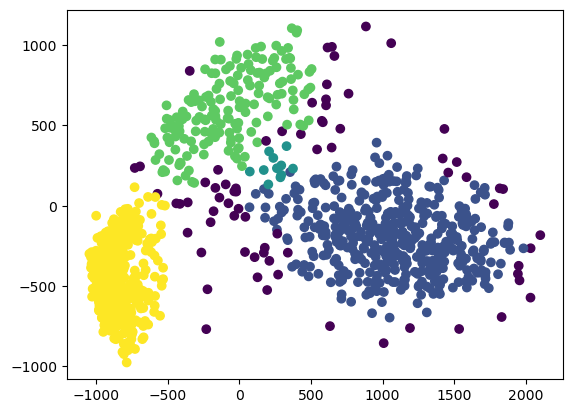

In [16]:
plt.scatter(x=points[0], y=points[1], c=labels)
plt.show()

**zadanie 6** Przeskaluj dane, tak aby miały rozkład standardowy (średnia = 0 , std = 1). I uruchom model SB-SCAN i k-średnich. Czy normalizacja zmieniła coś?

C:\Users\conta\anaconda3\envs\python\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\conta\anaconda3\envs\python\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(


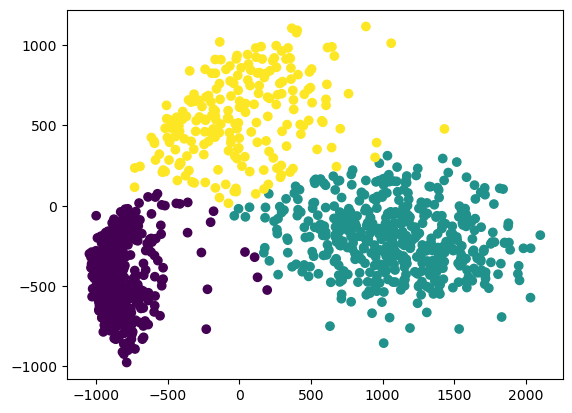

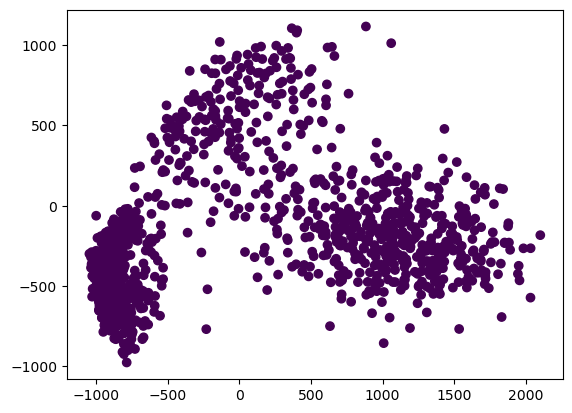

In [17]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(points)
normalized_data = scaler.transform(points)

kmeans = KMeans(3)
kmeans.fit(normalized_data)
clusters = kmeans.predict(normalized_data)
plt.scatter(x=points[0], y=points[1], c=clusters)
plt.show()

labels = db.fit_predict(normalized_data)

plt.scatter(x=points[0], y=points[1], c=labels)
plt.show()

### Redukcja wymiaru

Jedną z wad algorytmu k-średnich jest czas trenowania, który rośnie z wymiarem danych, jak ich z liczbą przykładów trenujących. Podstawową techniką w takim przypadku jest zmniejszenie wymiarowości danych. Najprostszą techniką jest [PCA](https://en.wikipedia.org/wiki/Principal_component_analysis).

In [18]:
from sklearn.decomposition import PCA

Ściągnijmy zbiór dancych MNIST, który pojawił się na naszych zajęciach.

In [23]:
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784')
X = mnist.data.astype('float64')
y = mnist.target
y

C:\Users\conta\anaconda3\envs\python\lib\site-packages\sklearn\datasets\_openml.py:932: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


0        5
1        0
2        4
3        1
4        9
        ..
69995    2
69996    3
69997    4
69998    5
69999    6
Name: class, Length: 70000, dtype: category
Categories (10, object): ['0', '1', '2', '3', ..., '6', '7', '8', '9']

Podczas tworzeania PCA, możemy podać wyjsciową liczbę wymiarów (argument *n_components*). 

In [20]:
pca = PCA(n_components=10)
pca.fit(X)

PCA(n_components=10)

In [21]:
mnist_pca = pca.transform(X)

**zadanie 7** Wytrenuj K-Means na wyjściu z PCA. Ustaw liczbę klastrów na 10. Ponadto zapisz do `mnist_clasters` numer klastra, do którego został on przydzielony.

In [22]:
kmeans = KMeans(10)
kmeans.fit(mnist_pca)
mnist_clusters = kmeans.predict(mnist_pca)
mnist_clusters

C:\Users\conta\anaconda3\envs\python\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([8, 9, 4, ..., 1, 0, 6])

**zadanie 8** Zmienna `y` zawiera informację o prawidłowych oznaczeniach: tj. liczby od 0 do 9 (włącznie). Dla każdej cyfry *i* znajdz klaster *j*, w którym znajduje się najwięcej cyfr *i*.

[[  22   10   20 3580   42  223  191   29  133 2653]
 [3576    7    8    0    4    6    6 4259   11    0]
 [ 317   73 4745   31  206  412  256  627  168  155]
 [ 119   44  247   14  199 4528   37  647 1135  171]
 [ 369 2049   36   16 3736    0  275  309   18   16]
 [ 900  306   15   90  455 1898   83  504 1494  568]
 [ 207    2  215   92  106   39 5321  627   69  198]
 [ 294 4183   55   20 2088    4    4  620   10   15]
 [ 619  265   93   45  215 1183   67  532 3740   66]
 [ 148 2647   20   55 3374   84   14  496   95   25]]


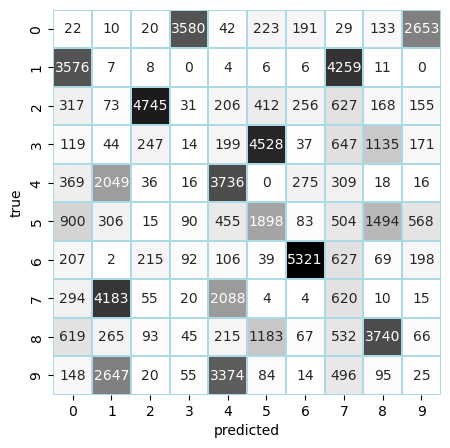

array([3, 7, 2, 5, 4, 5, 6, 1, 8, 4], dtype=int64)

In [76]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np
import seaborn as sns

mnist_clusters_as_string = np.char.mod('%d', mnist_clusters)
cm = confusion_matrix(y, mnist_clusters_as_string)
print(cm)

fig, ax = plt.subplots(figsize=(5,5))
plot = sns.heatmap(cm, ax=ax, cbar=False, annot=True, fmt='d', cmap='gist_yarg',
            linewidths=0.1,linecolor='lightblue')

plot.set(xlabel='predicted', ylabel='true')
plt.show()

np.argmax(cm, axis=1)

**zadanie 9** mając wyznaczone klasy z poprzedniego zadania, sumuj liczbę elementów w najpopularniejszym klastrze.

In [72]:
sums = np.sum(cm, axis=0)
print(np.argmax(sums),"------", np.max(sums))

4 ------ 10425


**zadanie 10** Oblicz accuracy biorąc wynik z poprzedniego zadania.

In [79]:
from sklearn.metrics import accuracy_score

accuracy_score(y, mnist_clusters_as_string)

0.28754285714285716

**zadanie 11** Spróbuj podwyższych wynik, stosując np. normalizację lub zmieniając parametry.


In [89]:
#NORMALIZACJA
pca = PCA(n_components=10)
pca.fit(X)

mnist_pca = pca.transform(X)

scaler = StandardScaler()
scaler.fit(mnist_pca)
normalized_data = scaler.transform(mnist_pca)

kmeans = KMeans(10)
kmeans.fit(normalized_data)
mnist_clusters = kmeans.predict(normalized_data)

mnist_clusters_as_string = np.char.mod('%d', mnist_clusters)

accuracy_score(y, mnist_clusters_as_string)

C:\Users\conta\anaconda3\envs\python\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


0.10692857142857143

In [88]:
#ZMIANA WSTEPNEJ LICZBY WYMIAROW
pca = PCA(n_components=20)
pca.fit(X)

mnist_pca = pca.transform(X)

kmeans = KMeans(10)
kmeans.fit(mnist_pca)
mnist_clusters = kmeans.predict(mnist_pca)

mnist_clusters_as_string = np.char.mod('%d', mnist_clusters)

accuracy_score(y, mnist_clusters_as_string)

C:\Users\conta\anaconda3\envs\python\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


0.012071428571428571



**Gratuluję!**